In [1]:
%load_ext rpy2.ipython
%R library(dplyr); library(magrittr); library(gridExtra); library(vegan); library(ggplot2)
import pandas as pd
import os
import glob
import os.path as op

//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘gridExtra’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:dplyr’:

    combine


  res = super(Functio

In [2]:
%%R
combine_smr_tables <- function(tablelist){
    all<-data.frame()
    for (t in tablelist){
        df = read.table(t, sep="\t", header=TRUE)
        all <- rbind(all, df) 
        }
    return(all)
    }

In [51]:
%%R -i tablelist
df <- combine_smr_tables(tablelist)

In [53]:
%%R
head(df)

         sag      metagenome Percent_scaffolds_with_any_coverage
1 AAA008-D05  Mex_OMZ_St6_30                                  NA
2 AAA008-D05  Mex_OMZ_St6_85                                 100
3 AAA008-D05 Mex_OMZ_St6_100                                 100
4 AAA008-D05 Mex_OMZ_St6_125                                 100
5 AAA008-D05 Mex_OMZ_St6_300                                 100
6 AAA008-D05 Mex_OMZ_St10_30                                  NA
  Percent_of_reference_bases_covered Average_coverage total_reads_recruited
1                           0.000000       0.00000000                     0
2                          32.390782       0.54146206                  1384
3                          14.190358       0.21449131                   490
4                           3.412210       0.06635864                    81
5                           1.696131       0.04579196                    59
6                           0.000000       0.00000000                     0
  mg_wgs_tech

In [3]:
def combine_smr_tables(tablelist):
    return pd.concat([pd.read_csv(t, sep="\t") for t in tablelist])

In [4]:
tablelist = glob.glob("../data/Maria_smr_tables/*overlap0.txt")
df = combine_smr_tables(tablelist).drop_duplicates()

In [55]:
combine_smr_tables(tablelist)[0:10]

,sag,metagenome,Percent_scaffolds_with_any_coverage,Percent_of_reference_bases_covered,Average_coverage,total_reads_recruited,mg_wgs_technology,mg_read_count,sag_completeness,sag_total_bp,sag_size_mbp,reads_per_mbp,prop_mgreads_per_mbp
0,AAA008-D05,Mex_OMZ_St6_30,NaN,0.000000,0.000000,0,illumina,1329963,25.86,608374,0.608374,0.000000,0.000000
1,AAA008-D05,Mex_OMZ_St6_85,100,32.390782,0.541462,1384,illumina,2241756,25.86,608374,0.608374,2274.916417,0.001015
2,AAA008-D05,Mex_OMZ_St6_100,100,14.190358,0.214491,490,illumina,1351111,25.86,608374,0.608374,805.425610,0.000596
3,AAA008-D05,Mex_OMZ_St6_125,100,3.412210,0.066359,81,illumina,882893,25.86,608374,0.608374,133.141784,0.000151
4,AAA008-D05,Mex_OMZ_St6_300,100,1.696131,0.045792,59,illumina,4430917,25.86,608374,0.608374,96.979818,0.000022
5,AAA008-D05,Mex_OMZ_St10_30,NaN,0.000000,0.000000,0,illumina,150767,25.86,608374,0.608374,0.000000,0.000000
6,AAA008-D05,Mex_OMZ_St10_85,100,52.778883,1.051847,2058,illumina,1848894,25.86,608374,0.608374,3382.787562,0.001830
7,AAA008-D05,Mex_OMZ_St10_125,100,4.767972,0.088155,109,illumina,1278329,25.86,608374,0.608374,179.166105,0.000140
8,AAA008-D05,Mex_OMZ_St10_300,100,1.156952,0.031688,8,illumina,1141681,25.86,608374,0.608374,13.149806,0.000012
9,AAA286-M02,Mex_OMZ_St6_30,NaN,0.000000,0.000000,0,illumina,1329963,54.65,1518643,1.518643,0.000000,0.000000


In [11]:
%%R
summarise_mgs <- function(df){
    mg_summary <- df %>% filter(sag == "concatenated_sags") %>% .[,c(1:8)]
    total_sag_bp <- df %>% .[,c(1,10)] %>% unique %>% filter(sag != "concatenated_sags") %>% .[,2] %>% sum 
    mg_summary$total_sag_bp <- total_sag_bp
    mg_summary$sag_size_mbp <- total_sag_bp/1000000
    mg_summary <- mg_summary %>% mutate(reads_per_mbp=total_reads_recruited/sag_size_mbp, 
                                        prop_mgreads_per_mbp=(total_reads_recruited/sag_size_mbp)/mg_read_count,
                                       pct_metagenome=(total_reads_recruited/mg_read_count)*100)
    underplot <- mg_summary[,c(2,ncol(mg_summary))]
    return(underplot)
}

In [12]:
def summarise_mgs(df):
    mg_summary = df[df['sag'] == "concatenated_sags"].iloc[:,0:8]
    total_sag_bp = round(df[df['sag'] != "concatenated_sags"].drop_duplicates().iloc[:,11].sum(), 0)
    mg_summary['total_sag_bp'] = total_sag_bp
    mg_summary['sag_size_mbp'] = total_sag_bp / 1000000
    mg_summary['reads_per_mbp'] = mg_summary['total_reads_recruited'] / mg_summary['sag_size_mbp']
    mg_summary['prop_mgreads_per_mbp'] = mg_summary.total_reads_recruited/mg_summary.sag_size_mbp/mg_summary.mg_read_count
    mg_summary['pct_metagenome'] = (mg_summary.total_reads_recruited/mg_summary.mg_read_count) * 100
    underplot = mg_summary.iloc[:,[1,-1]]
    return underplot
                                   

In [13]:
summarise_mgs(df)[0:10]

,metagenome,pct_metagenome
378,Mex_OMZ_St6_30,0.035565
379,Mex_OMZ_St6_85,0.386260
380,Mex_OMZ_St6_100,0.223076
381,Mex_OMZ_St6_125,0.064221
382,Mex_OMZ_St6_300,0.023178
383,Mex_OMZ_St10_30,0.011939
384,Mex_OMZ_St10_85,0.684517
385,Mex_OMZ_St10_125,0.060939
386,Mex_OMZ_St10_300,0.028292
546,LineP_A09_P04_10,0.014388


In [14]:
%%R
head(summarise_mgs(df))


Error in UseMethod("filter_") : 
  no applicable method for 'filter_' applied to an object of class "function"


In [24]:
%%R
summarise_sags <- function(pairs){
    total_mg_reads <- pairs[,8] %>% unique %>% sum
    sideplot <- pairs %>% group_by(sag) %>% summarise(pct_reads_recruited_allmgs = (sum(total_reads_recruited)/total_mg_reads)*100)
    return(sideplot)
}



Error in pairs[, 8] : object of type 'closure' is not subsettable


//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in pairs[, 8] : object of type 'closure' is not subsettable

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [25]:
def summarise_sags(df):
    pairs = df[df['sag']!="concatenated_sags"]
    total_reads = pairs.iloc[:,7].sum()
    saggroups = pairs.groupby('sag')
    return pd.DataFrame(saggroups['total_reads_recruited'].mean()/total_reads * 100)

In [26]:
summarise_sags(df)[:10]

,total_reads_recruited
sag,
AAA008-D05,1.249569e-05
AAA286-M02,1.603520e-05
AAA288-L16,4.069385e-05
AB-219-C22,8.713224e-08
AB-629-B06,7.753986e-06
AB-629-B18,4.443276e-05
AB-679-F13,2.530779e-06
AB-679-I05,1.076088e-05
AB-746-C02,1.403108e-05


In [ ]:
%%R
main_heatmap <- function(pairs, 
                         lowcolor="white",
                         midcolor="lightblue", 
                         highcolor="darkblue",
                        sagorder="None",
                        mgorder="None"){
    if (mgorder != "None"){
        pairs$metagenome <- with(pairs, factor(metagenome, levels=mgorder[,1]))
    }
    if (sagorder != "None"){
        pairs$sag <- with(pairs, factor(sag, levels=sagorder[,1]))
        }
    p1 <- pairs %>% ggplot(aes(metagenome, sag)) + geom_tile(aes(fill=prop_mgreads_per_mbp)) + theme_bw() 
    pmain <- p1 + theme(axis.ticks = element_blank(), axis.title.x=element_blank(), axis.text.x=element_blank())
    pmain <- pmain + labs(x=" ", fill="") + scale_fill_gradientn(colours=c(lowcolor,midcolor,highcolor), values=c(0,0.00001,1))
    pmain <- pmain  + theme(legend.key.height=unit(50, "pt"), legend.position="none") 
    pmain <- pmain + theme(panel.border = element_blank(), 
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank(), 
                           panel.background = element_blank()) 
    return(pmain)
}

In [27]:
import plotly.plotly as py
import plotly.graph_objs as go

In [30]:
df.columns

Index([u'sag', u'metagenome', u'Percent_scaffolds_with_any_coverage',
       u'Percent_of_reference_bases_covered', u'Average_coverage',
       u'total_reads_recruited', u'mg_wgs_technology', u'mg_read_count',
       u'sag_completeness', u'sag_total_bp', u'sag_size_mbp', u'reads_per_mbp',
       u'prop_mgreads_per_mbp'],
      dtype='object')

numpy.ndarray

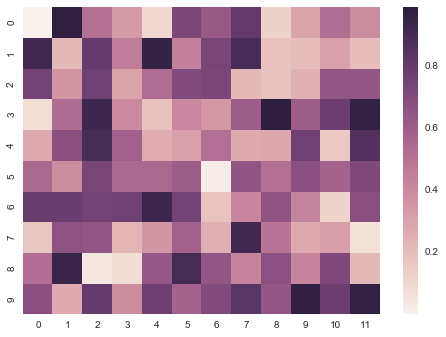

In [49]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
uniform_data = np.random.rand(10,12)
ax = sns.heatmap(uniform_data)
type(uniform_data)

In [51]:
rep_mat = df.pivot(index='sag', columns='metagenome', values='prop_mgreads_per_mbp')
rep_mat

metagenome,BalearicSea_Spain_1500,BalearicSea_Spain_1500v2,EDurban_SAfrica_SI_4002,EHawaii_NP_4004,EHawaii_NP_4013,EMadagascar_SI_3505,EMadagascar_SI_3505v2,ERio_Brazil_SA_3907,ERio_Brazil_SA_3907v2,Erecife_Brazil_SA_4001,...,SWAcapulco_Mexico_NP_3103,Sfunchal_NA_4003,Sfunchal_NA_4003v2,WCapeTown_SAfrica_SA_3902,WCapeVerde_A_4005,WCapeVerde_A_4005v2,WElSalvador_P_3008,WElSalvador_P_3008v2,WPerth_Australia_SI_4004,WSanLuca_Mexico_NP_402
sag,,,,,,,,,,,,,,,,,,,,,
AAA008-D05,1.831817e-04,4.423983e-06,1.025170e-05,3.585037e-05,7.206274e-05,2.709917e-04,2.284376e-04,1.521437e-05,1.531678e-05,1.376680e-05,...,3.844704e-04,3.224409e-05,3.543033e-05,6.618966e-05,0.000020,7.586346e-05,5.235727e-04,8.034856e-04,1.030977e-04,1.324597e-04
AAA286-M02,2.132835e-04,5.823153e-06,7.108041e-06,1.941502e-05,2.673019e-05,1.409663e-04,1.343118e-04,1.523734e-05,1.459364e-05,1.103006e-05,...,2.864730e-04,2.294231e-05,2.136197e-05,5.053378e-05,0.000017,5.484386e-05,3.834630e-04,6.067282e-04,4.830156e-05,6.919107e-05
AAA288-L16,1.640566e-04,4.256466e-06,1.270051e-05,4.160253e-05,6.193730e-05,2.361971e-04,2.080516e-04,2.227563e-05,2.060729e-05,2.378433e-05,...,3.404877e-04,3.466701e-05,3.898423e-05,7.626353e-05,0.000028,7.864482e-05,4.632729e-04,7.284969e-04,1.048955e-04,1.232067e-04
AB-219-C22,1.265174e-03,1.979128e-05,1.763936e-06,2.970027e-06,8.955065e-06,1.292450e-05,1.554291e-05,1.782617e-05,5.555813e-06,9.238141e-06,...,1.047172e-05,1.076480e-05,4.803101e-06,8.582850e-06,0.000000,3.900981e-06,1.618550e-05,9.355806e-06,1.563463e-05,1.742871e-05
AB-629-B06,2.151191e-04,1.084732e-05,1.082803e-05,1.823169e-05,3.321178e-05,1.502460e-04,1.393896e-04,1.119140e-05,1.243400e-05,8.860765e-06,...,2.736977e-04,1.775910e-05,2.027034e-05,4.239605e-05,0.000015,5.088613e-05,3.543981e-04,5.746708e-04,4.948666e-05,8.191207e-05
AB-629-B18,1.857805e-04,6.468479e-06,1.132213e-05,3.284229e-05,5.956634e-05,2.447674e-04,2.192851e-04,2.183358e-05,1.671239e-05,1.898274e-05,...,3.676835e-04,3.694225e-05,3.286448e-05,7.009039e-05,0.000023,7.710065e-05,4.904990e-04,7.452375e-04,8.544957e-05,1.231299e-04
AB-679-F13,1.738587e-05,2.367030e-06,5.862749e-04,9.166893e-04,7.488827e-04,8.771700e-04,8.284614e-04,1.017999e-03,9.064891e-04,7.871644e-04,...,9.723950e-04,1.091685e-03,1.022264e-03,1.195794e-03,0.001000,1.914901e-03,7.110764e-04,1.356094e-03,1.470362e-03,1.722580e-03
AB-679-I05,1.336699e-04,3.943057e-06,1.827450e-05,6.094763e-05,5.649763e-05,2.168128e-04,1.865729e-04,2.001779e-05,3.025515e-05,2.944854e-05,...,3.280710e-04,3.946233e-05,4.784658e-05,7.566656e-05,0.000041,8.471485e-05,4.284204e-04,6.889256e-04,9.500503e-05,1.099580e-04
AB-746-C02,1.566568e-04,9.575323e-06,1.740233e-04,3.498647e-05,4.263527e-05,4.795831e-05,7.724241e-05,9.043868e-05,1.456188e-04,5.667912e-05,...,6.938735e-05,4.850394e-05,5.422232e-05,7.898803e-05,0.000109,6.663181e-05,4.936803e-05,8.183092e-05,4.834557e-05,5.004372e-05


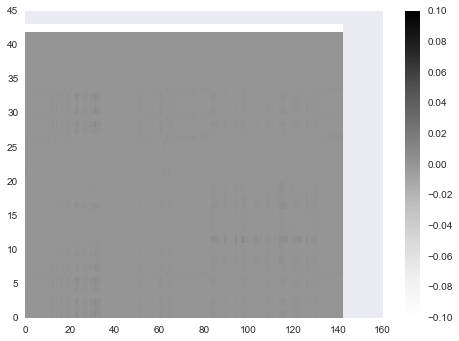

In [50]:
fig, ax = plt.subplots(1)

p = ax.pcolormesh(rep_mat.as_matrix())
fig.colorbar(p)